<a href="https://colab.research.google.com/github/aryan1429/deep-learning-lab/blob/main/mlp_mnist(w2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.utils import to_categorical

In [20]:
#Load the data
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)


(60000, 28, 28)


In [21]:
#Normalize The Image
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.

In [22]:
# One Hot Encoding
# Reshape the labels before one-hot encoding to ensure the correct shape
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [23]:
#Build the architecture
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
#Compile Model
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
#Train the Model
model.fit(X_train,y_train,epochs = 10,batch_size = 64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8522 - loss: 0.5067
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9648 - loss: 0.1181
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9763 - loss: 0.0817
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9821 - loss: 0.0586
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9872 - loss: 0.0427
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9890 - loss: 0.0352
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9912 - loss: 0.0293
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9913 - loss: 0.0247
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9943 - loss: 0.0185
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9939 - loss: 0.0179


In [26]:
#Evaluate Model
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0924


[0.07915078848600388, 0.9776999950408936]

In [29]:
#Predictions
sample_images = X_test[:5]
sample_labels = y_test[:5]
predictions = model.predict(sample_images)
print(predictions)
result = np.argmax(predictions, axis = 1)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[6.75529022e-10 2.14625248e-10 4.28112124e-08 1.35772507e-05
  6.41833498e-15 7.05698966e-08 1.17801464e-16 9.99985933e-01
  2.18085369e-10 3.14810762e-07]
 [2.08560578e-12 3.88687749e-09 1.00000000e+00 3.94902280e-08
  2.08977828e-20 5.93451980e-12 2.34385960e-15 4.22807041e-15
  8.39256442e-11 2.07120505e-22]
 [7.16537585e-08 9.99810755e-01 2.68423864e-05 2.42746921e-07
  4.52112454e-06 3.95161464e-07 6.31891317e-06 1.07240296e-04
  4.35780967e-05 4.38407399e-09]
 [9.99999762e-01 1.05152997e-09 1.76708994e-07 7.79971018e-11
  1.01376461e-13 4.12956752e-11 8.22154078e-08 1.09900379e-11
  5.66951976e-13 2.46640317e-12]
 [5.29086241e-09 2.51748822e-09 5.61984792e-10 7.29185670e-11
  9.99634624e-01 7.74377840e-10 5.72797099e-09 3.65430765e-06
  4.09609546e-09 3.61689745e-04]]
[7 2 1 0 4]


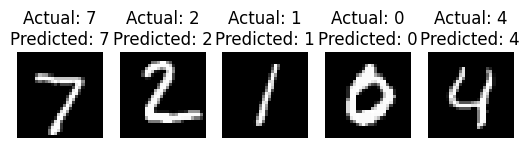

In [30]:
for i in range(5):
    actual = np.argmax(sample_labels[i])  # Actual digit label
    predicted = result[i]                 # Predicted digit
    plt.subplot(1, 5, i + 1)
    plt.title(f'Actual: {actual}\nPredicted: {predicted}')
    plt.imshow(sample_images[i], cmap='gray')
    plt.axis('off')
plt.show()